# Lab 1: Filtering Operations

Dario del Gaizo, Giulia Rebay, Isabella Rositi

### Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%%shell
jupyter nbconvert --to html /content/drive/MyDrive/CV_Labs/lab1-computervision.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/CV_Labs/lab1-computervision.ipynb to html
[NbConvertApp] Writing 5062737 bytes to /content/drive/MyDrive/CV_Labs/lab1-computervision.html


In [ ]:
import os
import sys
sys.path.append('/content/drive/MyDrive/CV_Labs/modules')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from numpy.fft import fft2, ifft2, fftshift
from scipy.signal import convolve2d

from Functions import *
from gaussfft import gaussfft
from fftwave import fftwave

filepath = "/content/drive/MyDrive/CV_Labs/modules/Images-npy/"

## Exercise 1

In [ ]:
from Functions import showgrey

In [ ]:
def my_fftwave(u, v, sz = 128):
    Fhat = np.zeros([sz, sz])
    Fhat[u, v] = 1

    F = np.fft.ifft2(Fhat)
    Fabsmax = np.max(np.abs(F))

    f = plt.figure()
    f.subplots_adjust(wspace=0.2, hspace=0.4)
    plt.rc('axes', titlesize=10)

    a1 = f.add_subplot(3, 2, 1)
    showgrey(Fhat, False)
    a1.title.set_text("Fhat: (u, v) = (%d, %d)" % (u, v))

    # What is done by these instructions? --> Answer: the numerical shift that is performed by np.fft.fftshift()
    if u < sz/2:
        uc = u
    else:
        uc = u - sz
    if v < sz/2:
        vc = v
    else:
        vc = v - sz

    wavelength = 0.0 # Replace by correct expression
    amplitude = 0.0 # Replace by correct expression

    a2 = f.add_subplot(3, 2, 2)
    showgrey(np.fft.fftshift(Fhat), False)
    a2.title.set_text("centered Fhat: (uc, vc) = (%d, %d)" % (uc, vc))

    a3 = f.add_subplot(3, 2, 3)
    showgrey(np.real(F), False, 64, -Fabsmax, Fabsmax)
    a3.title.set_text("real(F)")

    a4 = f.add_subplot(3, 2, 4)
    showgrey(np.imag(F), False, 64, -Fabsmax, Fabsmax)
    a4.title.set_text("imag(F)")

    a5 = f.add_subplot(3, 2, 5)
    showgrey(np.abs(F), False, 64, -Fabsmax, Fabsmax)
    a5.title.set_text("abs(F) (amplitude %f)" % amplitude)

    a6 = f.add_subplot(3, 2, 6)
    showgrey(np.angle(F), False, 64, -np.pi, np.pi)
    a6.title.set_text("angle(F) (wavelength %f)" % wavelength)

    plt.show()

$\textbf{Question1:}$

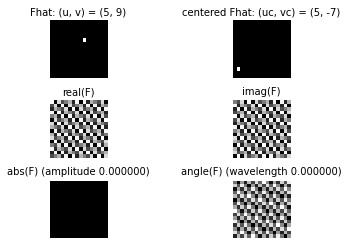

In [ ]:
my_fftwave(5,9, sz=16)

$\textbf{Fhat}:$ shows the image matrix with a pixel different from 0 in the (u, v) position.

$\textbf{centered Fhat}:$ shift the zero-frequency component to the center of the array, in the matrix case, it swaps the $1^{st}$ quadrant with the $3^{st}$ and the $2^{st}$ with the $4^{st}$. It's a shift respect to the origin of the matrix.

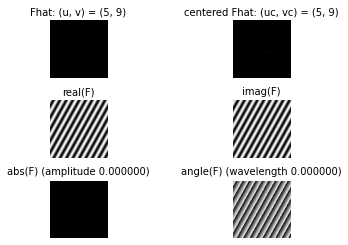

In [ ]:
my_fftwave(5,9)

$\textbf{real(F)}:$ the Real component of the Fourier transform, a wave that has slope $m = \frac v u$ respect to the $(x, y) \space$ axis, so in this case $y = \frac 9 5 x$

$\textbf{imag(F)}:$ the Imaginary component of the Fourier transform, which is the shifted (by $\frac{\pi}2$) wave of the Real component.

$\textbf{abs(F)}:$ with base settings, it shows amplitude of $0.0$.

$\textbf{angle(F)}:$ with base settings, it shows wavelength of $0.0$.

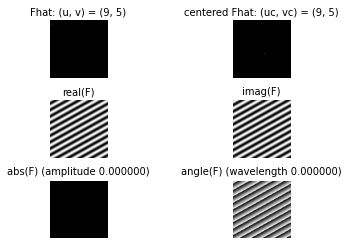

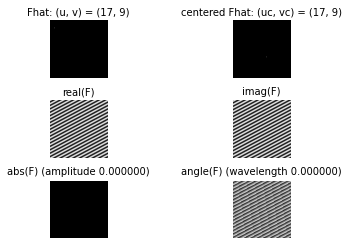

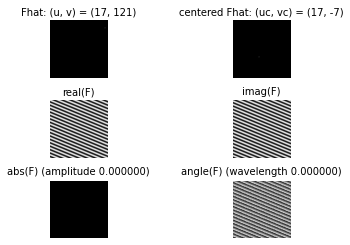

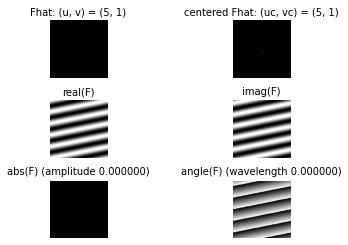

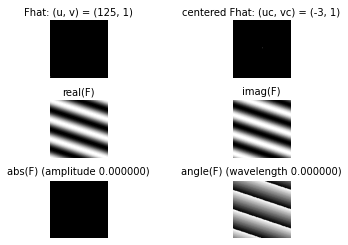

In [ ]:
my_fftwave(9,5)
print('\n\n')
my_fftwave(17,9)
print('\n\n')
my_fftwave(17,121)
print('\n\n')
my_fftwave(5,1)
print('\n\n')
my_fftwave(125,1)

We observe the 2-dimensional discrete Fourier Transform (the image), the fftshifted 2-dimensional discrete Fourier Transform, the Real and Imaginary parts of the inverse of the 2-dimensional discrete Fourier Transform, the $\textbf{absolute value}$ (with amplitude label set at 0.0 initially) and the $\textbf{angle}$ of the complex argument (with wavelength label set at 0.0 initially).

A consideration to make, is that the the angle with the narrowest representation is the one given by $(64, 64)$. The widest is given by either $(1, 1)$ or $(127, 127)$

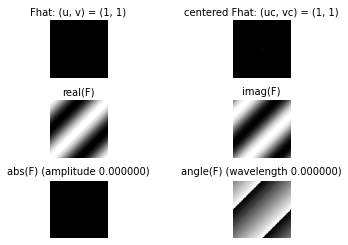

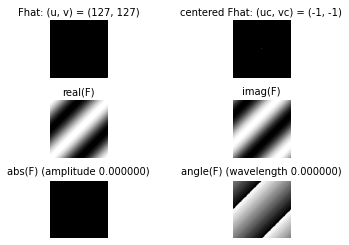

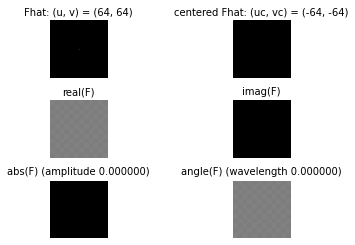

In [ ]:
my_fftwave(1,1)
print('\n\n')
my_fftwave(127,127)
print('\n\n')
my_fftwave(64,64)

$\textbf{Question 2:}$

A position $(p, q)$ in the Fourier domain will be projected as a sum of sine waves of different amplitude, frequency and phase decomposed between $\textbf{real(F)}$ and $\textbf{imag(F)}$.

To do so without decomposing, we simply plot the F = np.fft.ifft2(Fhat)

There are 4 representations:
* Continuous Fourier transform in the $\textbf{frequency domain:} \hat{f}(\omega) $
* Continuous Fourier transform in the $\textbf{spatial domain:} f(x) $
* Discrete Fourier transform in the $\textbf{frequency domain:} \hat{F}(u) $
* Discrete Fourier transform in the $\textbf{spatial domain:} F(x) $

In [ ]:
def to_spatial(u, v, sz = 128):
    Fhat = np.zeros([sz, sz])
    Fhat[u, v] = 1

    F = np.fft.ifft2(Fhat)
    Fabsmax = np.max(np.abs(F))

    f = plt.figure()
    f.subplots_adjust(wspace=0.2, hspace=0.4)
    plt.rc('axes', titlesize=10)

    a1 = f.add_subplot(1, 2, 1)
    showgrey(Fhat, False)
    a1.title.set_text("Fhat: (u, v) = (%d, %d)" % (u, v))

    a2 = f.add_subplot(1, 2, 2)
    showgrey(F, False, 64, -Fabsmax, Fabsmax)
    a2.title.set_text("Spatial domain of: (u, v) = (%d, %d)" % (u, v))

    plt.show()

/content/drive/MyDrive/CV_Labs/modules/Functions.py:46: ComplexWarning: Casting complex values to real discards the imaginary part
  im = res*(Image.astype(np.float32) - zmin)/float(range)


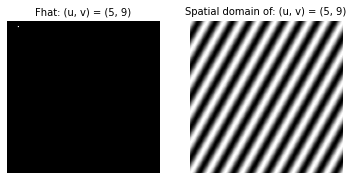

In [ ]:
to_spatial(5,9)

$\textbf{Question 3:}$

In [ ]:
def my_fftwave_adjusted(u, v, sz = 128):
    Fhat = np.zeros([sz, sz])
    Fhat[u, v] = 1

    F = np.fft.ifft2(Fhat)
    Fabsmax = np.max(np.abs(F))

    f = plt.figure()
    f.subplots_adjust(wspace=0.2, hspace=0.4)
    plt.rc('axes', titlesize=10)

    a1 = f.add_subplot(3, 2, 1)
    showgrey(Fhat, False)
    a1.title.set_text("Fhat: (u, v) = (%d, %d)" % (u, v))

    # What is done by these instructions? --> Answer: the numerical shift that is performed by np.fft.fftshift()
    if u < sz/2:
        uc = u
    else:
        uc = u - sz
    if v < sz/2:
        vc = v
    else:
        vc = v - sz

    wavelength = 0.0 # Replace by correct expression
    amplitude = 1/sz**2

    a2 = f.add_subplot(3, 2, 2)
    showgrey(np.fft.fftshift(Fhat), False)
    a2.title.set_text("centered Fhat: (uc, vc) = (%d, %d)" % (uc, vc))

    a3 = f.add_subplot(3, 2, 3)
    showgrey(np.real(F), False, 64, -Fabsmax, Fabsmax)
    a3.title.set_text("real(F)")

    a4 = f.add_subplot(3, 2, 4)
    showgrey(np.imag(F), False, 64, -Fabsmax, Fabsmax)
    a4.title.set_text("imag(F)")

    a5 = f.add_subplot(3, 2, 5)
    showgrey(np.abs(F), False, 64, -Fabsmax, Fabsmax)
    a5.title.set_text("abs(F) (amplitude %f)" % amplitude)

    a6 = f.add_subplot(3, 2, 6)
    showgrey(np.angle(F), False, 64, -np.pi, np.pi)
    a6.title.set_text("angle(F) (wavelength %f)" % wavelength)

    plt.show()

Amplitude in 2D is given by: $\frac 1 {M \space N}$ which in the square image case is $\frac 1 {N^2}$

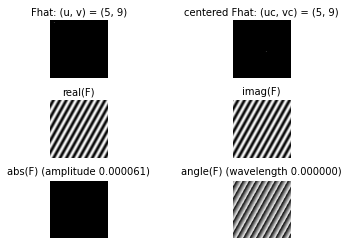

In [ ]:
my_fftwave_adjusted(5,9)

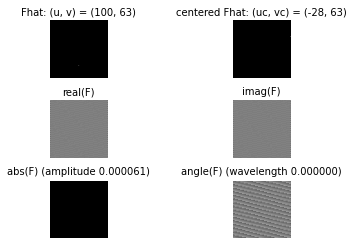

In [ ]:
my_fftwave_adjusted(100, 63)

The amplitude is the same for different positions, because the images have the same size and we only assign 1 non-zero value, otherwise it would've been the number of non-zero values times the denominator described above.

$\textbf{Question 4:}$

The slope of the sine wave is given by the slope of $m = \frac v u$. The direction of the wave is perpendicular to the slope, as seen in the lectures as $\phi = tan^{-1} (\frac{Im[\hat F]}{Re[\hat F]})$. The wavelenght is given by $\lambda = \frac 1 {\sqrt{u^2 + v^2}}$. However, since the smallest wavelength can be found for $u = v = \frac {sz} 2$, any points with lower coordinates will have decreasing frequencies and those with higher coordinates will have symmetric and increasing frequencies. Thus, in the code we will implement the formulas using the centered values $u = uc$ and $v = vc$ to respect this simmetry.


In [ ]:
def my_fftwave_adjusted(u, v, sz = 128):
    Fhat = np.zeros([sz, sz])
    Fhat[u, v] = 1

    F = np.fft.ifft2(Fhat)
    Fabsmax = np.max(np.abs(F))

    f = plt.figure()
    f.subplots_adjust(wspace=0.2, hspace=0.4)
    plt.rc('axes', titlesize=10)

    a1 = f.add_subplot(3, 2, 1)
    showgrey(Fhat, False)
    a1.title.set_text("Fhat: (u, v) = (%d, %d)" % (u, v))

    # What is done by these instructions? --> Answer: the numerical shift that is performed by np.fft.fftshift()
    if u < sz/2:
        uc = u
    else:
        uc = u - sz
    if v < sz/2:
        vc = v
    else:
        vc = v - sz

    wavelength = 1/np.sqrt(uc**2 + vc**2)
    amplitude = 1/sz**2

    a2 = f.add_subplot(3, 2, 2)
    showgrey(np.fft.fftshift(Fhat), False)
    a2.title.set_text("centered Fhat: (uc, vc) = (%d, %d)" % (uc, vc))

    a3 = f.add_subplot(3, 2, 3)
    showgrey(np.real(F), False, 64, -Fabsmax, Fabsmax)
    a3.title.set_text("real(F)")

    a4 = f.add_subplot(3, 2, 4)
    showgrey(np.imag(F), False, 64, -Fabsmax, Fabsmax)
    a4.title.set_text("imag(F)")

    a5 = f.add_subplot(3, 2, 5)
    showgrey(np.abs(F), False, 64, -Fabsmax, Fabsmax)
    a5.title.set_text("abs(F) (amplitude %f)" % amplitude)

    a6 = f.add_subplot(3, 2, 6)
    showgrey(np.angle(F), False, 64, -np.pi, np.pi)
    a6.title.set_text("angle(F) (wavelength %f)" % wavelength)

    plt.show()

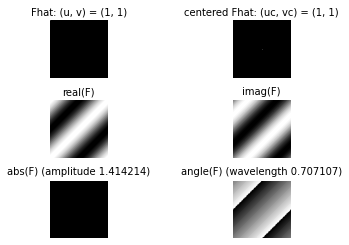

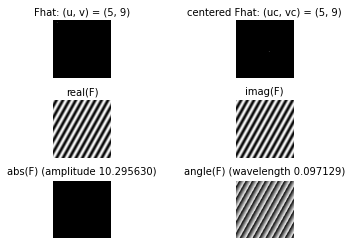

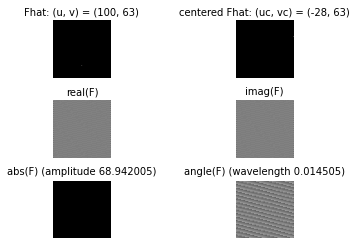

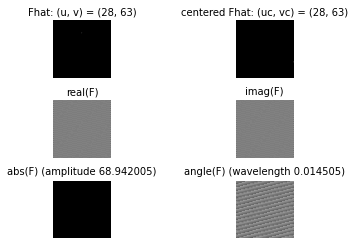

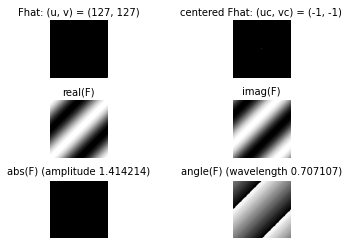

In [ ]:
my_fftwave_adjusted(1,1) #Wavelength is sqrt(2)/2!!
print('\n\n')
my_fftwave_adjusted(5,9)
print('\n\n')
my_fftwave_adjusted(100, 63)
print('\n\n')
my_fftwave_adjusted(28, 63)
print('\n\n')
my_fftwave_adjusted(127,127)

$\textbf{Question 5:}$

We show three images.

The first one has both coordinates smaller than the half point of the image with $u < \frac {sz} 2$ and $v < \frac {sz} 2$.

The second one has coordinates equal to $u' = sz-u$ and $v' = sz - v$.

The third has coordinates $u''= u$  and $v''=v' = sz - v$.

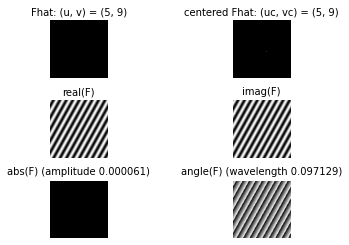

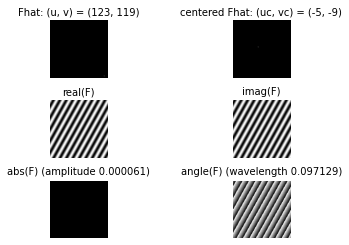

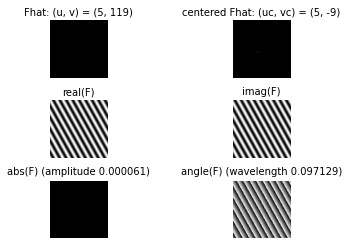

In [ ]:
my_fftwave_adjusted(5, 9)
print('\n\n')
my_fftwave_adjusted(123, 119)
print('\n\n')
my_fftwave_adjusted(5, 119)

Since the maximum frequency value is in correspondence of $ u = v = \frac {sz} 2$ (in this case for (64, 64) as coordinates), any points with lower coordinates will have increasing frequencies and those with higher coordinates will have symmetric and decreasing frequencies.

This means that for example th first and second images with points (5,9) and (123, 119) have the same frequency, hence the same wavelength. This can be explained by looking at the fact that the centered coordinates are opposed to each other, hence when calculating the wavelengths, these values are indeed the same.

The same happens when just one of the two coordinates goes over 64 (third picture). However, we can see that if in the first two also the phase is the same, in this case is opposite (the waves go in the opposite direction). We can see this difference also in the real and imaginary plots of the image.


$\textbf{Question 6:}$

It provides the numerical shift that is performed by np.fft.fftshift(). This means that it centers the coordinates of the image with respect to $\frac {sz} 2$. Graphically, this means that the image is shifted and we look at a different section of it (indeed, we need to think at the original image as a period of an infinite image and what we do is basically shifting the focus and looking at a different part of the image). Visually this means switching the first and third quadrant and second and fourth.

Mathematically this operation allows us to find the centered coordinate of the image which will be used in other calculations, as for example for the wavelength.

$\textbf{Question 7:}$

F is an image with 56 black rows, 16 white rows and 56 black rows. <br>
G is the transposed (white columns in the center). <br>
H is the sum of the two but G is doubled.

In [ ]:
F = np.concatenate([np.zeros((56,128)), np.ones((16,128)), np.zeros((56,128))])
G = F.T
H = F + 2*G

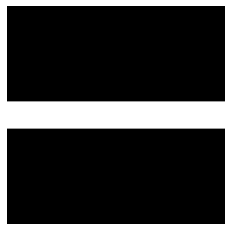

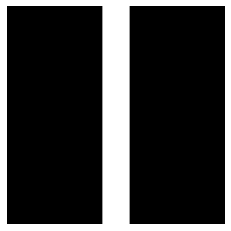

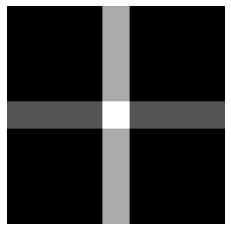

In [ ]:
showgrey(F)
showgrey(G)
showgrey(H)

Fourier transform:

In [ ]:
Fhat = fft2(F)
Ghat = fft2(G)
Hhat = fft2(H)

Fourier spectra:

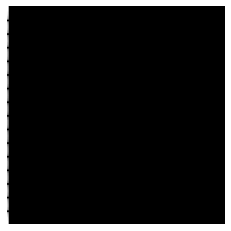

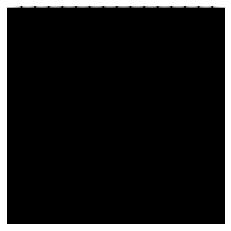

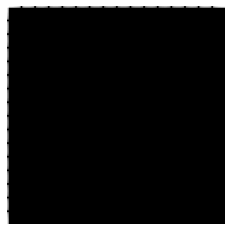

In [ ]:
showgrey(np.log(1 + np.abs(Fhat)))
showgrey(np.log(1 + np.abs(Ghat)))
showgrey(np.log(1 + np.abs(Hhat)))

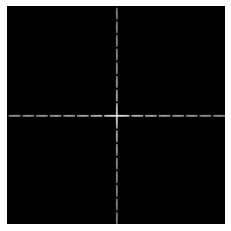

In [ ]:
showgrey(np.log(1 + np.abs(fftshift(Hhat))))

Matrix F has the greatest greyscale variation in the vertical direction, whereas matrix G, being defined as F.T, has greatest variation in the horizontal direction. This trend is clearly depicted by the Fourier spectra of both matrices, which only display variation in these two directions. This means that the frequencies associated to such images are 0 and $\frac \pi 2$, which are then combined in Hhat's spectra to the borders of the image.

$\textbf{Question 8:}$

Log transformations are used to compress large dynamic ranges and make details visible (rescaling of the range).

$\textbf{Question 9:}$

We have defined H as a linear combination of matrices F and G, with coefficients equal to 1 and 2 respectively. Linearity results in superposition of the inputs F and G both in the spatial and in the frequency domain, as can be observed in the outputs above. Our results are therefore supporting the theoretical claim according to which any linear operator obeys the superposition principle. Specifically, we can here see that linear operators are additive: in fact, H is defined as a sum of two input signals and Hhat also corresponds to the sum of the individual responses of said signals.

$\textbf{Question 10:}$

Let's start by recalling the **Convolution theorem**: Convolution in the spatial domain is completely equivalent to multiplication in the Fourier domain (and viceversa). Therefore, the 2-dimensional Fourier transform of matrix F * G is equivalent to the convolution of the individual Fourier transforms of the matrices F and G:

In [ ]:
F = np.concatenate([np.zeros((56,128)), np.ones((16,128)), np.zeros((56,128))])
G = F.T

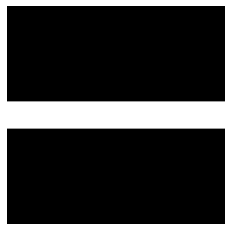

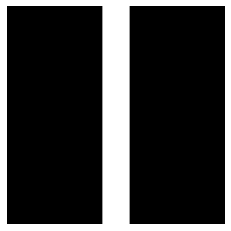

In [ ]:
showgrey(F)
showgrey(G)

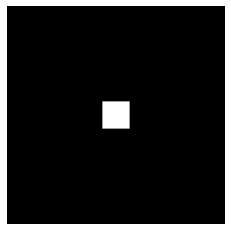

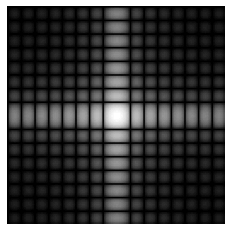

In [ ]:
showgrey(F * G)
showfs(fft2(F * G))

The first image is the point to point multiplication of the matrix, resulting in a non-zero square only in the intersection of the two original images.

**Convolution in the spatial domain** is the same as multiplication in the Fourier domain.

Fourier transform of F matrix, Fhat:


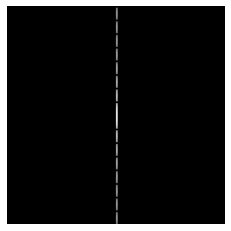



Fourier transform of G matrix, Ghat:


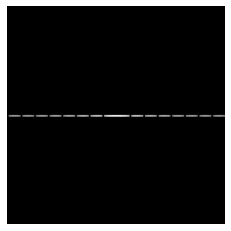



Convolution in the Fourier domain, not normalized:


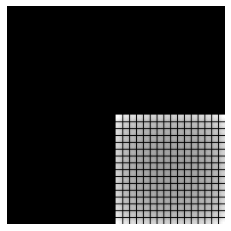



Convolution in the Fourier domain, normalized:


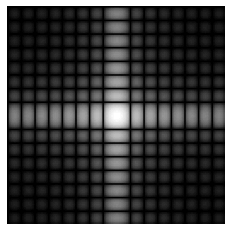

In [ ]:
Fhat = np.fft.fft2(F)
Ghat = np.fft.fft2(G)
print('Fourier transform of F matrix, Fhat:')
showfs(Fhat)
print('\n\nFourier transform of G matrix, Ghat:')
showfs(Ghat)
print('\n\nConvolution in the Fourier domain, not normalized:')
showfs(convolve2d(Fhat, Ghat))
print('\n\nConvolution in the Fourier domain, normalized:')
sz = 128
convoluted = convolve2d(Fhat, Ghat)/pow(sz,2)
convoluted = convoluted[:sz, :sz]
showfs(convoluted)

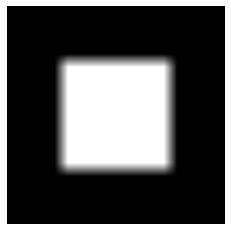

In [ ]:
conv = convolve2d(F, G)
showgrey(conv)

$\textbf{Question 11:}$

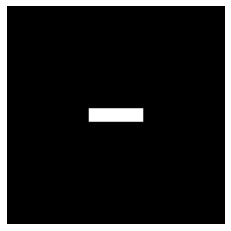

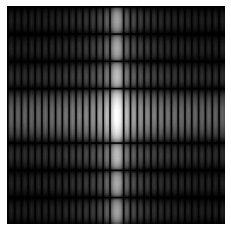

In [ ]:
F = np.concatenate([np.zeros((60,128)), np.ones((8,128)), np.zeros((60,128))]) * \
    np.concatenate([np.zeros((128,48)), np.ones((128,32)), np.zeros((128,48))], axis=1)
showgrey(F)

# Compute the Fourier transform of F and visualize its spectrum
Fhat = np.fft.fft2(F)
showfs(Fhat)

F is now a matrix where the only non-zero values are located in a small horizontal region located in the central part of the matrix. This is different from the matrix we were dealing with before, which had a symmetrical concentration of ones in its middle part. The different way the matrix is populated affects the Fourier representation of F, which  becomes asymmetrical (in the opposite sense with respect to the spatial domain). This is in line with the fact that having a horizontally rectangular shaped non zero domain results in greater frequency variations (in the greyscale sense) in a vertical direction, which explains why we have different phase and spectrum variations in the second Fourier transform when compared to the first. Scaling in the spatial domain therefore clearly affects the Fourier transform too, resulting in a compressed and directional output.

$\textbf{Question 12:}$

Do you recognize it?
The image is the exact translation in the Fourier domain of Fhat, which is what we expected from theory since we know that a rotation in the spatial domain corresponds to a rotation in the Fourier domain.

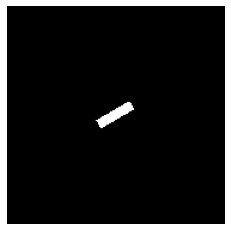

In [ ]:
rotF = rot(F, 30)
showgrey(rotF)

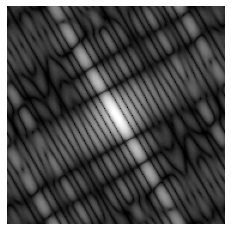

In [ ]:
rotFhat = fft2(rotF)
showfs(rotFhat)

Let What be the rotation in the Fourier domain of rotFhat (which was the Fourier transform of the rotation in the spatial domain of matrix F)

Rotated spectrum of the rotated image matrix F:


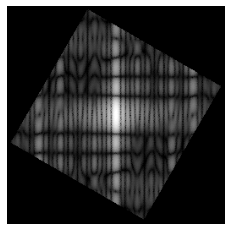



Spectrum of the original image matrix F:


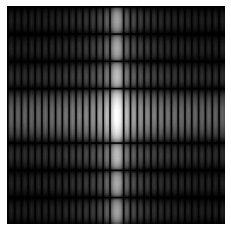

In [ ]:
What = rot(fftshift(rotFhat), -30)
print('Rotated spectrum of the rotated image matrix F:')
showgrey(np.log(1 + np.abs(What)))
print('\n\n' + 'Spectrum of the original image matrix F:')
showfs(Fhat)

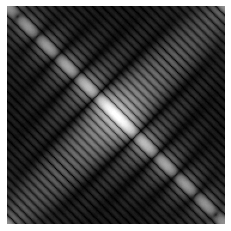

In [ ]:
A = rot(F, 45)
showfs(fft2(A))

Rotated spectrum of the rotated image matrix F:


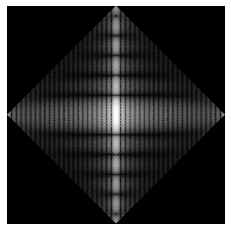



Spectrum of the original image matrix F:


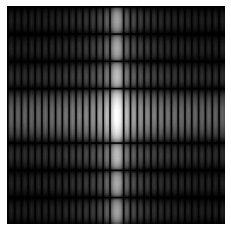

In [ ]:
rotA = rot(fftshift(fft2(A)), -45)
print('Rotated spectrum of the rotated image matrix F:')
showgrey(np.log(1 + np.abs(rotA)))
print('\n\n' + 'Spectrum of the original image matrix F:')
showfs(Fhat)

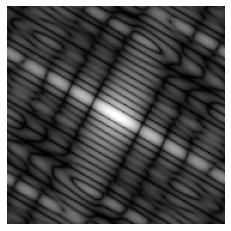

In [ ]:
B = rot(F, 60)
showfs(fft2(B))

Rotated spectrum of the rotated image matrix F:


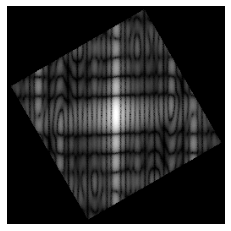



Spectrum of the original image matrix F:


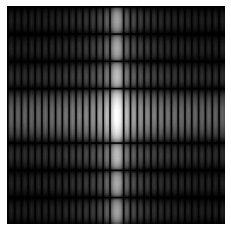

In [ ]:
rotB = rot(fftshift(fft2(B)), -60)
print('Rotated spectrum of the rotated image matrix F:')
showgrey(np.log(1 + np.abs(rotB)))
print('\n\n' + 'Spectrum of the original image matrix F:')
showfs(Fhat)

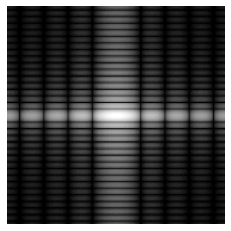

In [ ]:
C = rot(F, 90)
showfs(fft2(C))

Rotated spectrum of the rotated image matrix F:


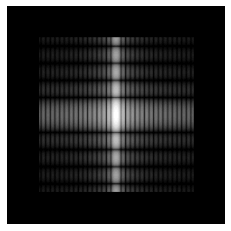



Spectrum of the original image matrix F:


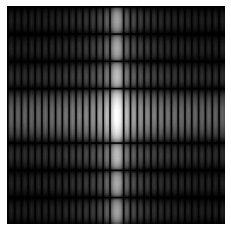

In [ ]:
rotC = rot(fftshift(fft2(C)), -90)
print('Rotated spectrum of the rotated image matrix F:')
showgrey(np.log(1 + np.abs(rotC)))
print('\n\n' + 'Spectrum of the original image matrix F:')
showfs(Fhat)

What first of all stands out, when looking at the spectra plotted above and at their rotations and/or transformations, is that only rotations of 45° or 90° do not affect the frequencies of the spectrum at all, as opposed to the 30° and 60° which lead to a wavy distortion in the frequency domain which can still be spotted after rotating back the image to the original orientation. The 45° and 90° cases, on the other hand, completely lack the noisy disturbances in the frequency domain, which appear in the 30° and 60° situations as black, wavy spots. This could be due to how different rotation angles affect differently the internal matrix disposition of digits and numbers as these numbers rotate within the free spots inside the matrix. While 45° and 90° rotations allow for easy and organized rotations (the non zero digits are distributed in free matrix spots with no problems in space and allocation), in the case of 30° and 60° of rotation there might be some uneven disposition of non-zero indexes and numbers, thus leading to some perturbation along the rotation direction which results in the black, wavy noise in the frequency representation.

$\textbf{Question 13:}$

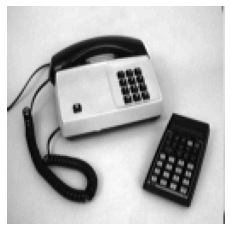

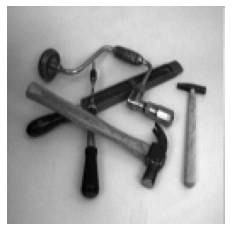

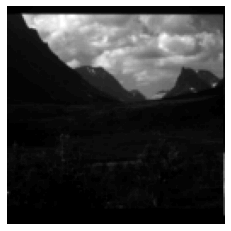

In [ ]:
phone = np.load(filepath + "phonecalc128.npy")
few = np.load(filepath + "few128.npy")
nallo = np.load(filepath + "nallo128.npy")
showgrey(phone)
showgrey(few)
showgrey(nallo)

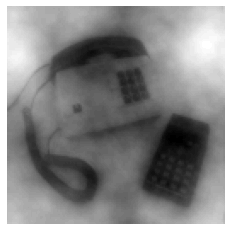

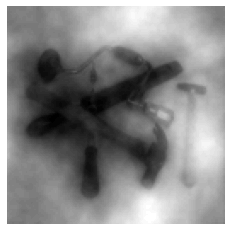

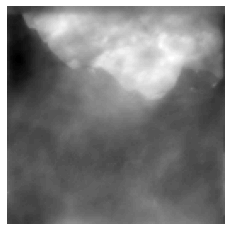

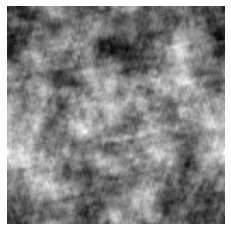

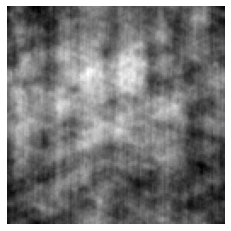

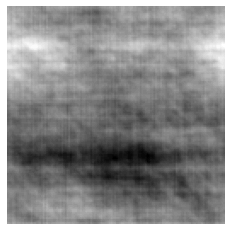

In [ ]:
showgrey(pow2image(phone))
showgrey(pow2image(few))
showgrey(pow2image(nallo))

showgrey(randphaseimage(phone))
showgrey(randphaseimage(few))
showgrey(randphaseimage(nallo))

The above images allow us to better understand the different information content carried by the Fourier phase and magnitude of a specturm.
Indeed, by first printing to screen the original images and then two different transformations, we are able to appreciate the impact that magnitude and phase have on image visualization. First, by applying the **pow2image** transformation, the power spectrum of the images was replaced by a non-linear transformation. Qualitatively, this affected the gray-scale intensity of the images, leaving the representation of attributes itself (i.e: the way points are visualized thus how the image's features appear on screen) untouched. This allowed us to conclude that the magnitude of the Fourier transform of an image carries information on the gray scale intensity, location by location, of the image. Mathematically, the magnitude of a signal equates to the length of the complex vector in the frequency domain: the higher the magnitude, the greater the intensity.
On the other hand, phase provides information on how the image looks like once it is represented. In other words, phase affects the final distribution and spacial organization of the image's features. If magnitude essentially impacts the colour intensity, phase directly impacts the visual disposition of these colours: a randomly distributed phase will therefore result in a chaotic image carrying no visual information on the original objects that the image represented. Indeed, mathematically the phase represents the angle which the complex vector associated to a specific frequency of the signal forms with the positive x-semiaxis. This intuitively explains why changing the phase of the images results in chaotic cloud of points.

## Exercise 2

Pixels: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 


Real Image


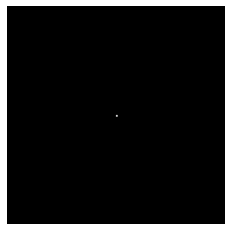

In [ ]:
image = deltafcn(128, 128)
print("Pixels:", "\n", image, "\n\n")
print("Real Image")
showgrey(image)

In [ ]:
def gaussfft(pic, t):
    #get N and M of the image
    [h, w] = np.shape(pic)
    #get the sample of 2d gaussian using np.meshgrid
    [x, y] = np.meshgrid(np.linspace(0, 1-1/h, h), np.linspace(0, 1-1/w, w)) #128 points all equally spaced
    # fourier transform of the kernel
    ft_gauss = np.exp(t*(np.cos(2*np.pi*x)+np.cos(2*np.pi*y) - 2))
    # fourier transform of the image
    ft = np.fft.fft2(pic)
    # convolution
    conv = ft * ft_gauss
    # transform the convulation into the spatial domain and only consider the real part (the imaginery part cancels out)
    im = np.real(np.fft.ifft2(conv))
    return im

In [ ]:
#let's check if it works like the test function provided

gaussian_conv = gaussfft(image, 1)
test = discgaussfft(image,1)
gaussian_conv == test

(128, 128) (128, 128) (128, 128)


array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

$\textbf{Question 14:}$

In [ ]:
t = [0.1, 0.3, 1.0, 10.0, 100.0]
sigma2_dic = {}

for i in t:
    psf = gaussfft(image, i)
    sigma2 = variance(psf)
    sigma2_dic[i] = sigma2
    print("t=",i, "\n", psf, "\n\n", "Variance-covariance matrix:")
    display(sigma2_dic[i])
    print()

t= 1e-10 
 [[ 3.46944695e-18  3.13257264e-19  1.69259207e-18 ...  1.71472457e-19
   1.69259207e-18  3.13257264e-19]
 [ 7.70500869e-20  4.18883749e-19 -5.25451875e-19 ...  6.85364059e-20
  -5.25451875e-19  4.18883749e-19]
 [-1.56696536e-18 -1.71659574e-19  6.30730777e-19 ... -2.10153932e-19
   6.30730777e-19 -1.71659575e-19]
 ...
 [ 3.64891386e-18  6.85364061e-20  1.59814340e-19 ...  1.05679058e-19
   1.59814340e-19  6.85364059e-20]
 [-1.56696536e-18 -1.71659574e-19  6.30730777e-19 ... -2.10153932e-19
   6.30730777e-19 -1.71659575e-19]
 [ 7.70500869e-20  4.18883749e-19 -5.25451875e-19 ...  6.85364059e-20
  -5.25451875e-19  4.18883749e-19]] 

 Variance-covariance matrix:


array([[1.06243625e-10, 1.42941214e-14],
       [1.42941214e-14, 1.07129527e-10]])


t= 0.3 
 [[ 1.08420217e-18 -5.69206141e-19  1.66018458e-19 ... -1.47913128e-19
   1.05032085e-19  6.77626358e-19]
 [ 9.25061346e-19  5.40034193e-19  3.44693529e-19 ... -1.65501910e-19
  -1.03080814e-19  1.00494338e-18]
 [-4.57169537e-19  1.17614333e-19  3.82585435e-19 ... -7.18510899e-20
   2.61468496e-19  5.16921728e-19]
 ...
 [ 2.62803217e-18 -3.12634061e-19 -7.66727446e-19 ... -8.29480101e-20
  -1.08661454e-18 -3.79278238e-19]
 [-4.57169537e-19 -8.19435909e-20  2.53070560e-19 ... -3.39943698e-19
   3.99726302e-19  6.47797923e-19]
 [ 9.25061346e-19  1.08699149e-18 -1.04160305e-19 ... -1.84930914e-19
   3.58577068e-19  5.00541349e-19]] 

 Variance-covariance matrix:


array([[ 3.00000000e-01, -7.41073869e-14],
       [-7.41073869e-14,  3.00000000e-01]])


t= 1.0 
 [[ 5.96311195e-19  1.38235777e-18  5.11607900e-19 ...  1.19431646e-19
   5.11607900e-19  2.16840434e-18]
 [ 6.36656259e-20  8.42617639e-19  2.01682389e-19 ... -5.14365977e-20
   2.62369330e-19  2.01070062e-18]
 [ 3.18337085e-21  8.76018351e-19  2.81081149e-19 ... -8.15126454e-20
   2.54775819e-19  1.10505456e-18]
 ...
 [ 1.57300302e-19  9.84193437e-19  3.98838188e-19 ... -2.35753608e-19
   6.87524779e-20  5.35044668e-19]
 [ 3.18337085e-21  9.68788234e-19  3.97068078e-19 ... -2.06158430e-19
   1.08856142e-19  8.67050316e-19]
 [ 6.36656259e-20  9.77381535e-19  3.75891450e-19 ... -1.96802777e-19
   7.49555678e-20  1.74428993e-18]] 

 Variance-covariance matrix:


array([[1.00000000e+00, 1.89848137e-14],
       [1.89848137e-14, 1.00000000e+00]])


t= 10.0 
 [[ 1.01360334e-19  2.67122740e-20 -1.83138328e-19 ... -2.63483498e-19
  -2.09822843e-19 -5.66635707e-19]
 [ 8.83775708e-20 -2.70672944e-20 -2.67526387e-19 ... -1.89153391e-19
  -1.44888929e-19 -5.28647095e-19]
 [ 5.24716385e-20 -1.08114282e-19 -3.67549900e-19 ... -1.49679186e-19
  -9.86457240e-20 -4.89456875e-19]
 ...
 [ 1.42269437e-21 -2.90739972e-20 -1.32504617e-19 ... -5.68525910e-19
  -4.12826928e-19 -6.14600544e-19]
 [ 5.24716385e-20  2.15347567e-20 -1.15234059e-19 ... -4.75636664e-19
  -3.56252229e-19 -6.17691623e-19]
 [ 8.83775708e-20  4.29399862e-20 -1.30568627e-19 ... -3.65417688e-19
  -2.84398192e-19 -5.98919824e-19]] 

 Variance-covariance matrix:


array([[1.00000000e+01, 1.57651669e-14],
       [1.57651669e-14, 1.00000000e+01]])


t= 1000.0 
 [[1.05885499e-05 1.06049391e-05 1.06540815e-05 ... 1.07359008e-05
  1.06540815e-05 1.06049391e-05]
 [1.06049391e-05 1.06213537e-05 1.06705721e-05 ... 1.07525181e-05
  1.06705721e-05 1.06213537e-05]
 [1.06540815e-05 1.06705721e-05 1.07200186e-05 ... 1.08023443e-05
  1.07200186e-05 1.06705721e-05]
 ...
 [1.07359008e-05 1.07525181e-05 1.08023443e-05 ... 1.08853022e-05
  1.08023443e-05 1.07525181e-05]
 [1.06540815e-05 1.06705721e-05 1.07200186e-05 ... 1.08023443e-05
  1.07200186e-05 1.06705721e-05]
 [1.06049391e-05 1.06213537e-05 1.06705721e-05 ... 1.07525181e-05
  1.06705721e-05 1.06213537e-05]] 

 Variance-covariance matrix:


array([[8.70989765e+02, 2.08166817e-16],
       [2.08166817e-16, 8.70989765e+02]])

We can see that the variance-covariance matrix is approximable to the identity matrix multiplied by the variance of the gaussian *t*. Indeed, the variances on the diagonal are all equal to the variance *t* given of the gaussian kernel and the covariances (outside the diagonal) are all equal to 0.

$\textbf{Question 15:}$

The results are approximable to the ideal continuous case.

From the probability theory we know that for gaussian distributions in the interval $[-\sigma, \sigma]$ there are the 60.7% of the observations. This means that in the frequencies domain, almost $\frac 2 3$ of the frequencies of an image are distributed in this interval. Thus, the parameter $\sigma$ in the Fourier domain measures how much impact the filter has on the pixels of an image and it does so by influencing the values of the kernel. If the variance is low in the spatial domain, then the values in the kernel will decay very fast going from the center values of the matrix to the outer rows and columns, because the interval is smaller. On the other hand, for high variances, the interval will be wider and the values of the kernel will decay slower, meaning that the high frequencies will tend to be cut off in favour of the lower frequencies.

In the spatial domain $\sigma^2$ is a division factor, whereas in the fourier domain is a multiplication factor. This means that if the variance has a high value in the spatial domain, then in the Fourier domain it's very narrow. The higher the variance in the spatial domain, the smaller in the frequency domain.

$\textbf{Question 16:}$

t= 1.0


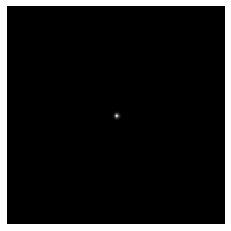

t= 4.0


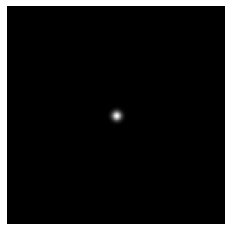

t= 16.0


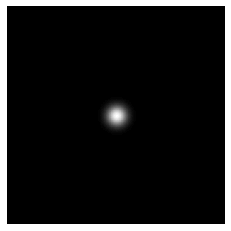

t= 64.0


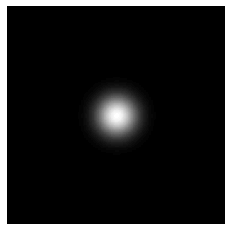

t= 256.0


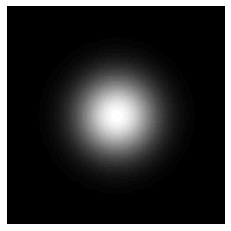

In [ ]:
t = [1.0, 4.0, 16.0, 64.0, 256.0]

for i in t:
    psf = gaussfft(image, i)
    print("t=", i)
    showgrey(psf)

The convolved images present a bigger point in the center as the variance gets bigger: this is because as the variance increases, high frequencies are filtered in favor of lower ones, which will cause a flattening of the gray levels of the images. With the higher variances, indeed, we can observe that the transition from white to black pixels is not as evident and direct as the transition in images which were convolved with gaussian with lower variances.

# Exercise 3

additive noise


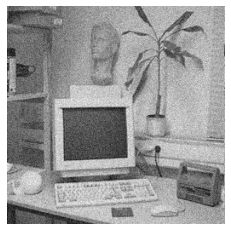


 salt and pepper noise


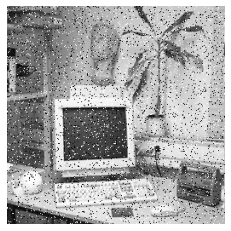

In [ ]:
office = np.load(filepath + "office256.npy")
add = gaussnoise(office, 16)
sap = sapnoise(office, 0.1, 255)

print("additive noise")
showgrey(add)

print("\n", "salt and pepper noise")
showgrey(sap)

The first image represents a sampling noise (also called Gaussian), which is additive and independent at each pixel and also independent of the signal intensity.

The second image represents a measurament noise also called salt and pepper and it's due to faults of the camera chip. We can see that ndividual pixel values are completely wrong and are either black or white.

$\textbf{Question 17:}$

**Gaussian Filter**

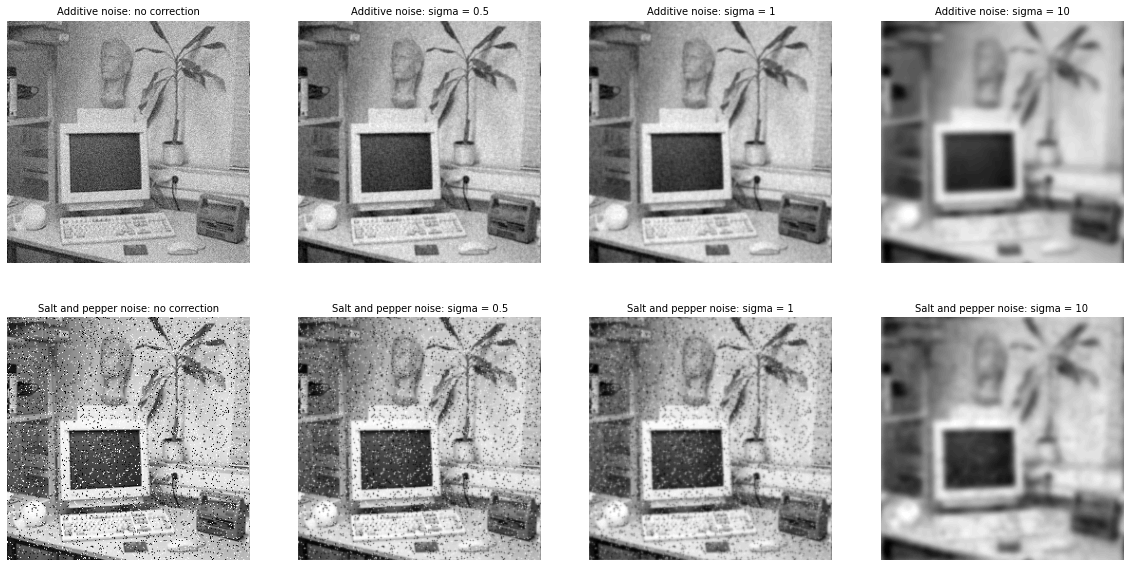

In [ ]:
#apply gaussian filter to reduce noise

f = plt.figure(figsize = (20,10))
plt.rc('axes', titlesize=10)

a1 = f.add_subplot(2,4, 1)
showgrey(add, False)
a1.title.set_text("Additive noise: no correction")

a2 = f.add_subplot(2,4, 5)
showgrey(sap, False)
a2.title.set_text("Salt and pepper noise: no correction")

a3 = f.add_subplot(2,4, 2)
showgrey(gaussfft(add, 0.5), False)
a3.title.set_text("Additive noise: sigma = 0.5")

a4 = f.add_subplot(2,4, 6)
showgrey(gaussfft(sap, 0.5), False)
a4.title.set_text("Salt and pepper noise: sigma = 0.5")

a5 = f.add_subplot(2,4, 3)
showgrey(gaussfft(add, 1), False)
a5.title.set_text("Additive noise: sigma = 1")

a6 = f.add_subplot(2,4, 7)
showgrey(gaussfft(sap, 1), False)
a6.title.set_text("Salt and pepper noise: sigma = 1")

a7 = f.add_subplot(2,4, 4)
showgrey(gaussfft(add, 10), False)
a7.title.set_text("Additive noise: sigma = 10")

a8 = f.add_subplot(2,4, 8)
showgrey(gaussfft(sap, 10), False)
a8.title.set_text("Salt and pepper noise: sigma = 10")

plt.show()

We can see that a variance of 10 is definitely too high and the image resulting is way too blurred. This happens because the filter describes how much the gray-level value of a particular pixel spreads to its neighbors. So the further you are from a particular pixel, less information is spread from the center pixel to that pixel, but a high variance (10) in the frequency domain means that this domain is narrow, so the image is very blurred because every point of the image is affecting a large area of the image. Since all pixels are affecting each other, then that will be very blurred.
Moreover we can notice a smoothing in the images with both $\sigma^2 = 0.5$ and $\sigma^2 = 1$, although for the variance equal to 0.5 we see more noise, but also less blur than in the image filtered with a gaussian kernel of variance 1. This means that with a variance of 0.5 the filter is suppressing the higher and lower frequencies less, hence more noise, but also more sharpness. On the other hand, the filter with variance equal to 1 is suppressing the higher and lower frequencies a little more, hence less noise, but also less sharpness.

**Median Filter**

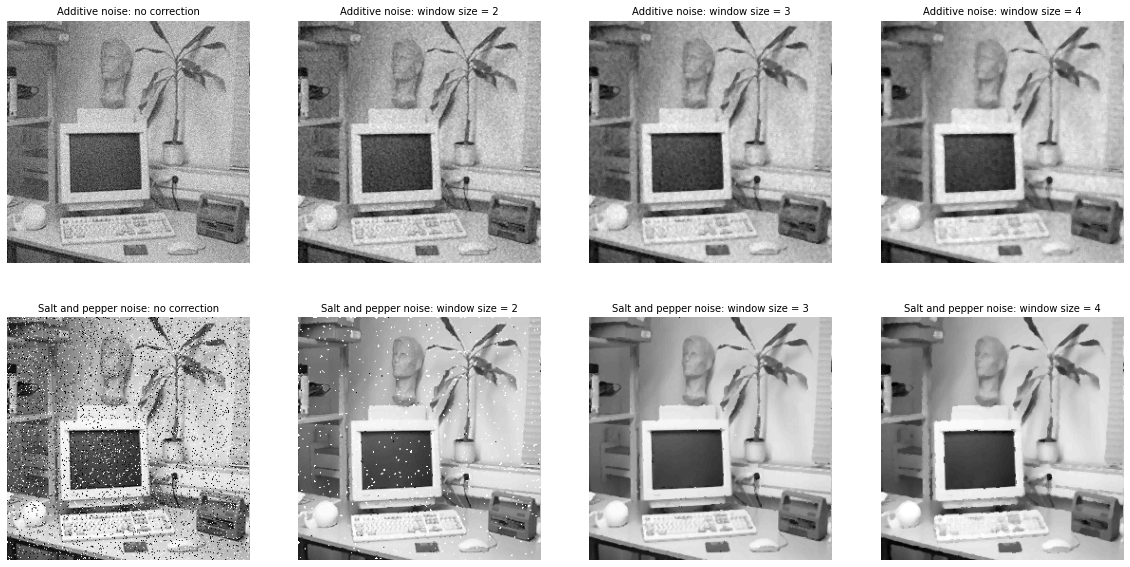

In [ ]:
# apply median filtering to reduce noise

f = plt.figure(figsize = (20,10))
plt.rc('axes', titlesize=10)

a1 = f.add_subplot(2,4, 1)
showgrey(add, False)
a1.title.set_text("Additive noise: no correction")

a2 = f.add_subplot(2,4, 5)
showgrey(sap, False)
a2.title.set_text("Salt and pepper noise: no correction")


a3 = f.add_subplot(2,4, 2)
showgrey(medfilt(add, 2), False)
a3.title.set_text("Additive noise: window size = 2")

a4 = f.add_subplot(2,4, 6)
showgrey(medfilt(sap, 2), False)
a4.title.set_text("Salt and pepper noise: window size = 2")

a5 = f.add_subplot(2,4, 3)
showgrey(medfilt(add, 3), False)
a5.title.set_text("Additive noise: window size = 3")

a6 = f.add_subplot(2,4, 7)
showgrey(medfilt(sap, 3), False)
a6.title.set_text("Salt and pepper noise: window size = 3")

a7 = f.add_subplot(2,4, 4)
showgrey(medfilt(add, 4), False)
a7.title.set_text("Additive noise: window size = 4")

a8 = f.add_subplot(2,4, 8)
showgrey(medfilt(sap, 4), False)
a8.title.set_text("Salt and pepper noise: window size = 4")

plt.show()

We can see the main properties of the filter:
- it doesn't blur the image, but it preserves the gradual changes in the grey levels.
- the edges are preserved

It gets rid of both the additve noise and the salt and pepper noise (in this case it's really impressive), however, it creates a "painting" effect on the image. we can see that this effect increases as the window size of the filter increases. For example, with a window size of 4x4, this effect is too accentuated, whereas for a 3x3 window we can see that the noise is mostly corrected and this effect is not too strong.

**Ideal Low-Pass Filter**

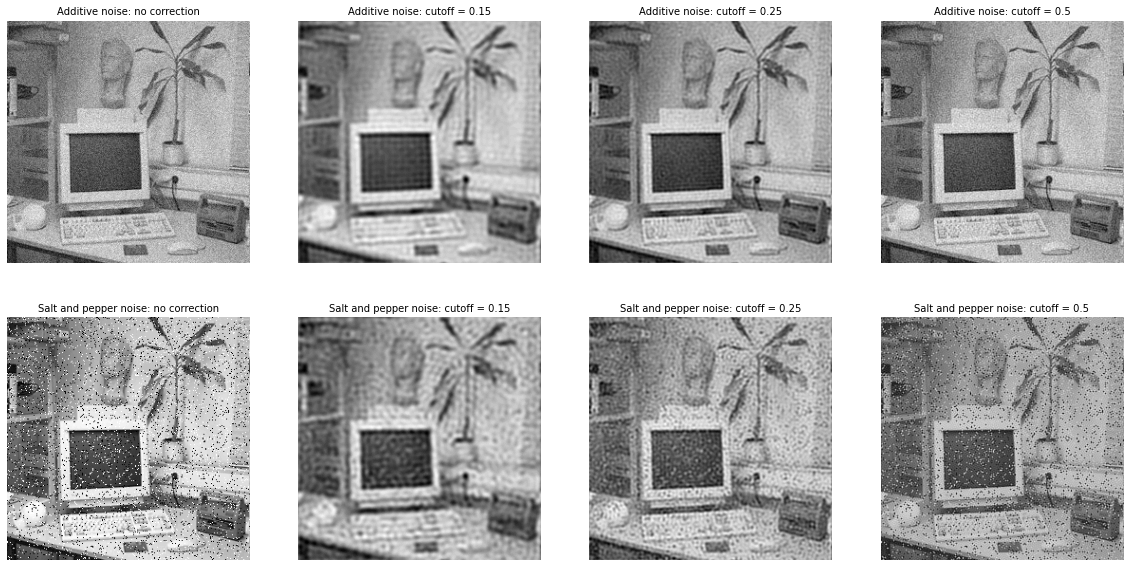

In [ ]:
# apply low-pass ideal filtering

f = plt.figure(figsize = (20,10))
plt.rc('axes', titlesize=10)

a1 = f.add_subplot(2,4, 1)
showgrey(add, False)
a1.title.set_text("Additive noise: no correction")

a2 = f.add_subplot(2,4, 5)
showgrey(sap, False)
a2.title.set_text("Salt and pepper noise: no correction")


a3 = f.add_subplot(2,4, 2)
showgrey(ideal(add, 0.15), False)
a3.title.set_text("Additive noise: cutoff = 0.15")

a4 = f.add_subplot(2,4, 6)
showgrey(ideal(sap, 0.15), False)
a4.title.set_text("Salt and pepper noise: cutoff = 0.15")

a5 = f.add_subplot(2,4, 3)
showgrey(ideal(add, 0.25), False)
a5.title.set_text("Additive noise: cutoff = 0.25")

a6 = f.add_subplot(2,4, 7)
showgrey(ideal(sap, 0.25), False)
a6.title.set_text("Salt and pepper noise: cutoff = 0.25")

a7 = f.add_subplot(2,4, 4)
showgrey(ideal(add, 0.5), False)
a7.title.set_text("Additive noise: cutoff = 0.5")

a8 = f.add_subplot(2,4, 8)
showgrey(ideal(sap, 0.5), False)
a8.title.set_text("Salt and pepper noise: cutoff = 0.5")

plt.show()

The ideal low-pass filter suppresses all the frequencies higher than the cutoff frequency. There's a main problem when we set the cutoff to a low frequency: we can see a waveform pattern on the image (for example for cutoff = 0.15 they're very clear and for cutoff = 0.25 they are noticebale especially in the addition noise image). This happens due to the shape of the low-pass filter: we're enhancing some low frequencies that are distorting the image. However, as we set a higher cutoff (0.5), these waveforms are pretty much unnoticeable.
Moreover, the lower the cutoff, the more blurred the image.

For frequencies higher then 0.5, the low-pass ideal filter is not smoothing the image anymore, meaning that there are very few frequencies higher than 0.5 to suppress in the origianl image.

$\textbf{Question 18:}$

Let's compare image corrections made with different filters.

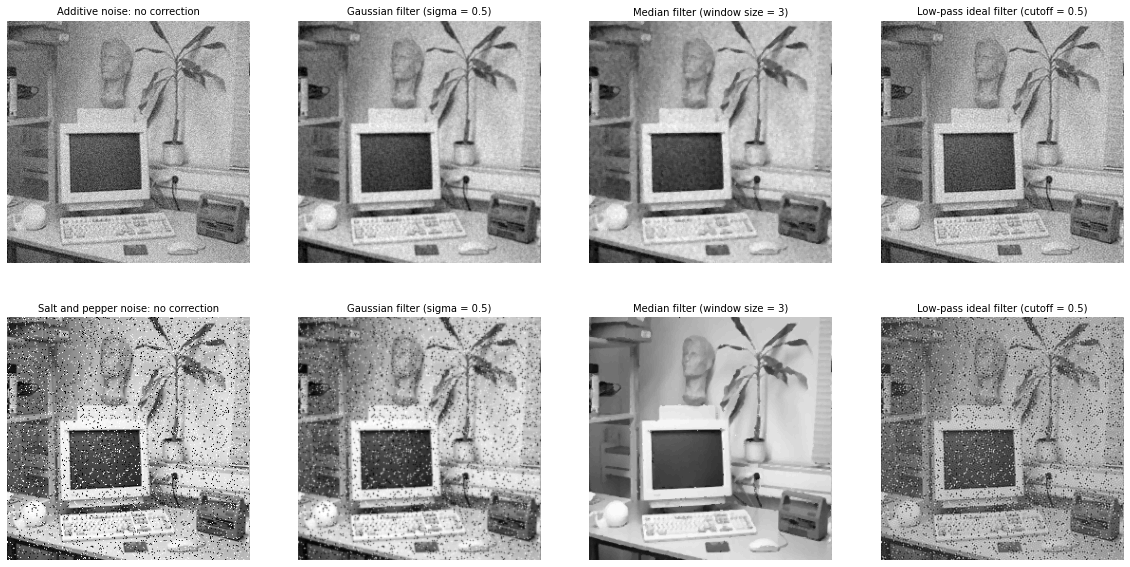

In [ ]:
# compare all filters

f = plt.figure(figsize = (20,10))
plt.rc('axes', titlesize=10)

a1 = f.add_subplot(2,4, 1)
showgrey(add, False)
a1.title.set_text("Additive noise: no correction")

a2 = f.add_subplot(2,4, 5)
showgrey(sap, False)
a2.title.set_text("Salt and pepper noise: no correction")


a3 = f.add_subplot(2,4, 2)
showgrey(gaussfft(add, 0.5), False)
a3.title.set_text("Gaussian filter (sigma = 0.5)")

a4 = f.add_subplot(2,4, 6)
showgrey(gaussfft(sap, 0.5), False)
a4.title.set_text("Gaussian filter (sigma = 0.5)")

a5 = f.add_subplot(2,4, 3)
showgrey(medfilt(add, 3), False)
a5.title.set_text("Median filter (window size = 3)")

a6 = f.add_subplot(2,4, 7)
showgrey(medfilt(sap, 3), False)
a6.title.set_text("Median filter (window size = 3)")

a7 = f.add_subplot(2,4, 4)
showgrey(ideal(add, 0.5), False)
a7.title.set_text("Low-pass ideal filter (cutoff = 0.5)")

a8 = f.add_subplot(2,4, 8)
showgrey(ideal(sap, 0.5), False)
a8.title.set_text("Low-pass ideal filter (cutoff = 0.5)")

plt.show()

We can see that the gaussian and median filters are more effective than the low-pass ideal in smoothing the image for both the types of noise. For the salt and pepper noise the median filter is without any doubt the best solution, even if it presents a "painting" effect. However, a solution could be further applying a gaussian filter to blur a little the image and balance this effect.

For the additive noise the gaussian filter provides the best results without blurring the image too much nor providing a “painting” effect (as does the median filter).

For the salt and pepper noise we can see that the gaussian and low-pass filters are not solving the issue at all, they just smooth the image.

Let's try adding a gaussian filter to the already (median) filtered image and see if the painting effect is less accentuated.

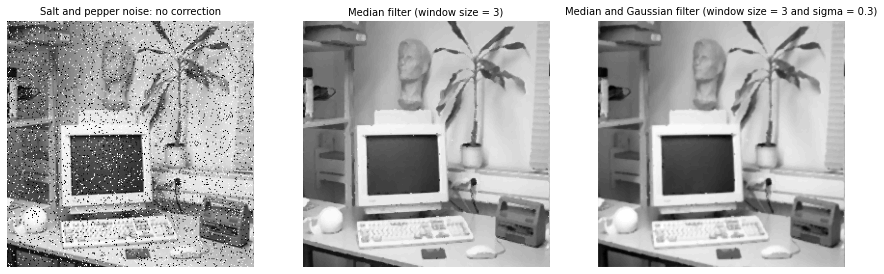

In [ ]:
f = plt.figure(figsize = (15,5))
plt.rc('axes', titlesize=10)

a1 = f.add_subplot(1,3, 1)
showgrey(sap, False)
a1.title.set_text("Salt and pepper noise: no correction")

a2 = f.add_subplot(1,3, 2)
showgrey(medfilt(sap, 3), False)
a2.title.set_text("Median filter (window size = 3)")

a3 = f.add_subplot(1,3, 3)
showgrey(gaussfft(medfilt(sap, 3), 0.3), False)
a3.title.set_text("Median and Gaussian filter (window size = 3 and sigma = 0.3)")

plt.show()

We can observe that in this case there is none to very little difference in the images, hence the "painting" effect remains.

$\textbf{Question 19:}$

The function "rawsubsample" subsamples an image following a chess grid.

Original Image: resolution (16, 16)


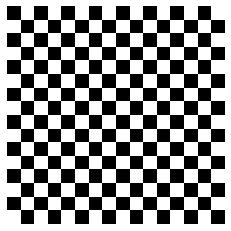


Subsampled image (8, 8)


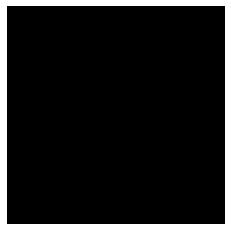

In [ ]:
inpic = np.zeros([16, 16])
for i in range(len(inpic[0])):
	for j in range(len(inpic[0])):

		if (i+j) % 2:
			inpic[i, j] = 1

print("Original Image: resolution", np.shape(inpic))
showgrey(inpic)


[h, w] = np.shape(inpic)
[h2, w2] = [int(h/2), int(w/2)]
newimg = np.zeros((h2, w2))
ur = np.linspace(0, h2*2-2, h2)
vr = np.linspace(0, w2*2-2, w2)
[X, Y] = np.meshgrid(ur, vr)
newimg = inpic[Y.astype(int), X.astype(int)]
print()
print("Subsampled image", np.shape(newimg))
showgrey(newimg)

**Gaussian Filter:**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


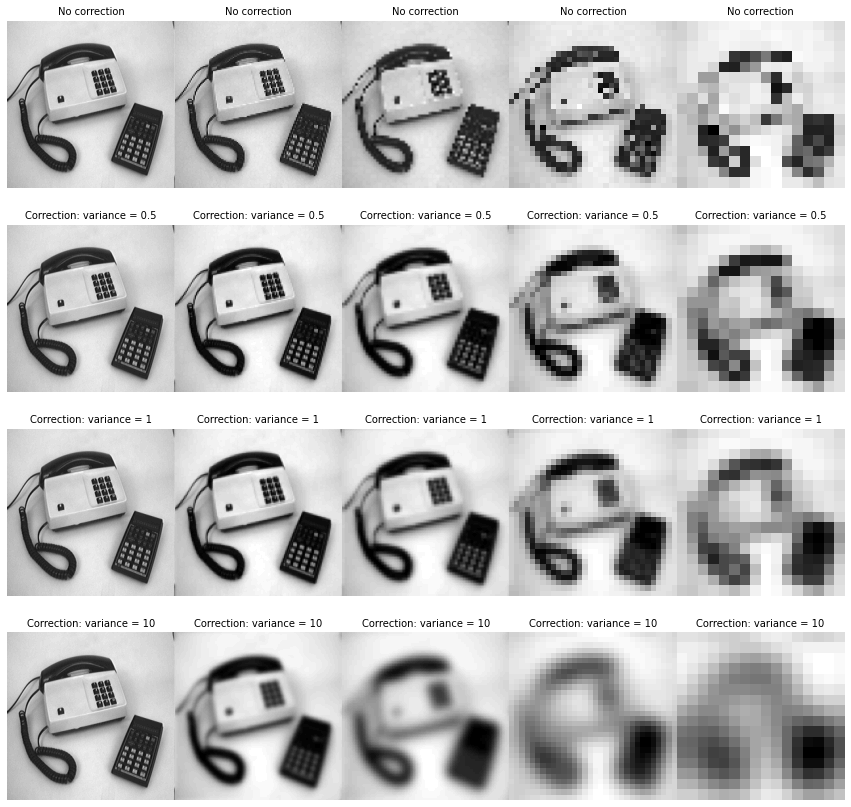

In [ ]:
# gaussian filter
N = 5
var = [0.5, 1, 10]

f = plt.figure(figsize = (15, 15))
f.subplots_adjust(wspace=0, hspace=0)
for ind, v in enumerate(var):
    img = np.load(filepath+"phonecalc256.npy")
    smoothimg = img
    for i in range(N):
        if i > 0: # generate subsampled versions
            img = rawsubsample(img)
            smoothimg = gaussfft(smoothimg, v)
            smoothimg = rawsubsample(smoothimg)
        f.add_subplot(len(var)+1, N, i + 1, title = "No correction")
        showgrey(img, False)
        f.add_subplot(len(var)+1, N, i + (ind+1)*N + 1, title = "Correction: variance = "+str(v))
        showgrey(smoothimg, False)
plt.show()

Best value of the variance at $i = 1$ seems to be $var = 1$. With $var = 10$ the correction is too evident (it is too much blurred), whereas with $var = 0.5$ it is under-corrected (not blended enough).

**Low-pass Ideal Filter**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


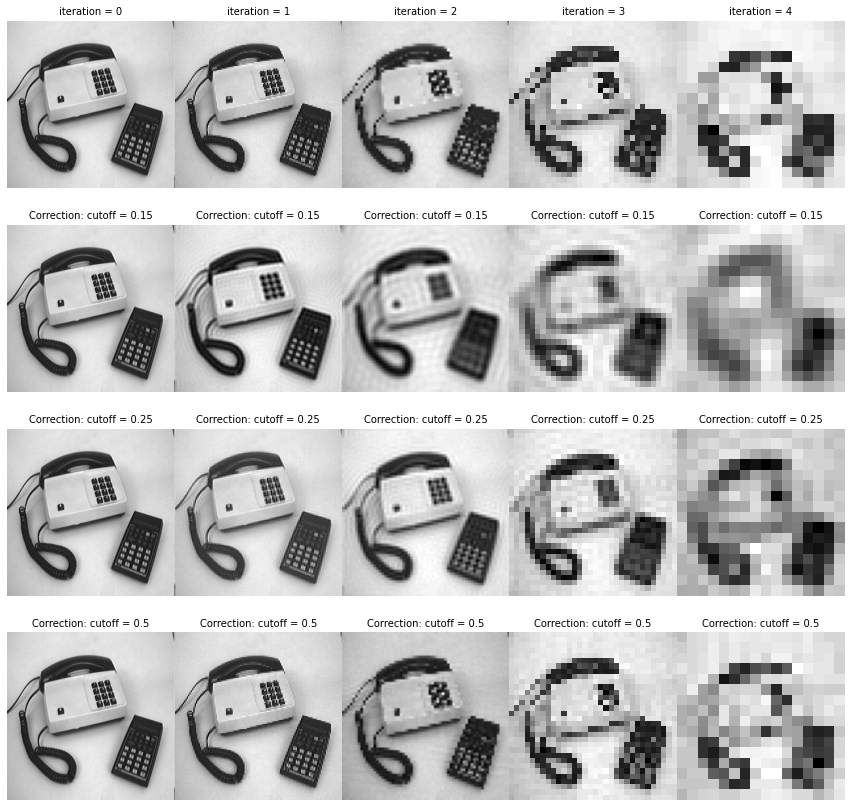

In [ ]:
# low-pass ideal filter
N = 5
cutoff = [0.15, 0.25, 0.5]

f = plt.figure(figsize = (15, 15))
f.subplots_adjust(wspace=0, hspace=0)
for ind, c in enumerate(cutoff):
    img = np.load(filepath+"phonecalc256.npy")
    smoothimg = img
    for i in range(N):
        if i > 0: # generate subsampled versions
            img = rawsubsample(img)
            smoothimg = ideal(smoothimg, c)
            smoothimg = rawsubsample(smoothimg)
        f.add_subplot(len(cutoff)+1, N, i + 1, title = "iteration = " +str(i))
        showgrey(img, False)
        f.add_subplot(len(cutoff)+1, N, i + (ind+1)*N + 1, title = "Correction: cutoff = "+str(c))
        showgrey(smoothimg, False)
plt.show()

If the cut-off in the low-pass filter is too **low**, then too many waves are going to be seen in the final image, as can be deducted from $cut_{off} = 0.15$ at $i = 1$. If it is too high, $cut_{off} = 0.5$, then not enough high frequencies are been cut-off, so the correction is little to none.

**Comparison of different filters for $i = 4$ and the best parameter.**

Gaussian Filter: $var = 1$ (even if the difference with 0.5 is really low)

Low-pass ideal Filter: $cut_{off} = 0.5$. At 0.25 the characteristics are not recognizable anymore (although, again the difference is minimal at such resolution).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


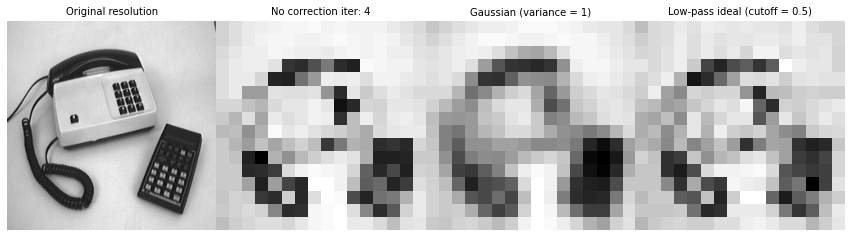

In [ ]:
# compare for i = 4
N = 5
fun = [gaussfft, ideal]
par = [1, 0.5]

titles = ["Gaussian (variance = 1)", "Low-pass ideal (cutoff = 0.5)"]
f = plt.figure(figsize = (15, 15))
f.subplots_adjust(wspace=0, hspace=0)


for ind, fu in enumerate(fun):
    img = np.load(filepath+"phonecalc256.npy")
    smoothimg = img
    f.add_subplot(1, 4, 1, title = "Original resolution")
    showgrey(img, False)
    for i in range(N):
        if i>0: # generate subsampled versions
            img = rawsubsample(img)
            smoothimg = fu(smoothimg, par[ind])
            smoothimg = rawsubsample(smoothimg)

            if i == 4:
                f.add_subplot(1, 4, 2, title = "No correction iter: " + str(i))
                showgrey(img, False)
                f.add_subplot(1, 4, ind+3, title = titles[ind])
                showgrey(smoothimg, False)

plt.show()

The Gaussian Filter is much more smooth in maintaining the general shape of the image. The Low-pass ideal filter is more fragmented and could be a better choice with high-frequency noisier pictures.

$\textbf{Question 20:}$

The **Low-pass ideal filter** looks at the difference between pixels. If the difference is high (one pixel is black and the other one is white), then in the frequency domain there will be a high frequency wave. If the frequency is higher than a threshold, this will be suppressed, meaning that the resulting image will present less extreme gray levels.

The **Gaussian filter** acts around the middle value radially in every direction, just like the 2d-Gaussian function. The higher the variance, the more the Gaussian wave is flat, as are the gray levels of the resulting image.



Overall, smoothing is necessary with subsampling because by downgrading the number of pixels of an image, it creates high differences among the remaining pixels, hence the characteristics of the image tend to become less clear as the resolution of the image decreases. This resonates with the wave sampling technique that imposes a minimum sampling frequency. However, for i = 4 the image has such low resolution that the smoothing is not enough to make the objects recognizable.

The higher the variance in the gaussian filter, the more high frequencies are penalized, and the image appears more towards gray (similarly to having a low cut-off in the low-pass ideal filter). The smaller the variance, the narrower is the gaussian bell, so high frequencies are not going to be penalized (similarly to having a high cut-off).
